In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from plotly import express as px
from plotly import graph_objects as go
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# Reading in CSV file
df = pd.read_csv('Data/vgsales.csv')

In [3]:
# Displaying first 5 rows of data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Dropping null values
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].fillna(0).astype(int)

In [6]:
# Changing Year to integer
df['Year'] = df['Year'].astype(int)

In [7]:
# Grouping Publisher and Global sales
games_sales = df.groupby('Name')['Global_Sales'].sum().nlargest(10)

In [8]:
# Define the bar trace
trace = go.Bar(
    x=games_sales.index,
    y=games_sales.values,
    marker=dict(
        color="dodgerblue",
        line=dict(color='black', width=2)
    ),
    opacity=0.75
)

# Define the layout for the graph
layout = go.Layout(
    title='Top 10 Games by Global Sales',
    xaxis=dict(
        title='Games'
    ),
    yaxis=dict(
        title='Global Sales (in millions)'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    paper_bgcolor='beige',
    plot_bgcolor="beige"
)

# Plotting the graph
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [9]:
# Grouping publisher and global sales
publisher_revenue = df.groupby('Publisher')['Global_Sales'].sum()
# Creating a top 10 publishers
top_publishers = publisher_revenue.sort_values(ascending=False).head(10)

In [10]:
# Define the bar trace
trace = go.Bar(
    x=top_publishers.index,
    y=top_publishers.values,
    marker=dict(
        color="mediumseagreen",
        line=dict(color='black', width=2)
    ),
    opacity=0.75
)

# Define the layout for the graph
layout = go.Layout(
    title='Top 10 Publishers by Revenue',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Revenue'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    paper_bgcolor='beige',
    plot_bgcolor="beige"
)

# Plotting the graph
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [11]:
# Grouping genre and global sales
genre_revenue = df.groupby('Genre')['Global_Sales'].sum()
# Creating top 10 genres
top_genres = genre_revenue.sort_values(ascending=False).head(10)

In [12]:
# Define the bar trace
trace = go.Bar(
    x=top_genres.index,
    y=top_genres.values,
    marker=dict(
        color="teal",
        line=dict(color='black', width=2)
    ),
    opacity=0.75
)

# Define the layout for the graph
layout = go.Layout(
    title='Top 10 Genres by Revenue',
    xaxis=dict(
        title='Genres'
    ),
    yaxis=dict(
        title='Revenue'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    paper_bgcolor='beige',
    plot_bgcolor="beige"
)

# Plotting the graph
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

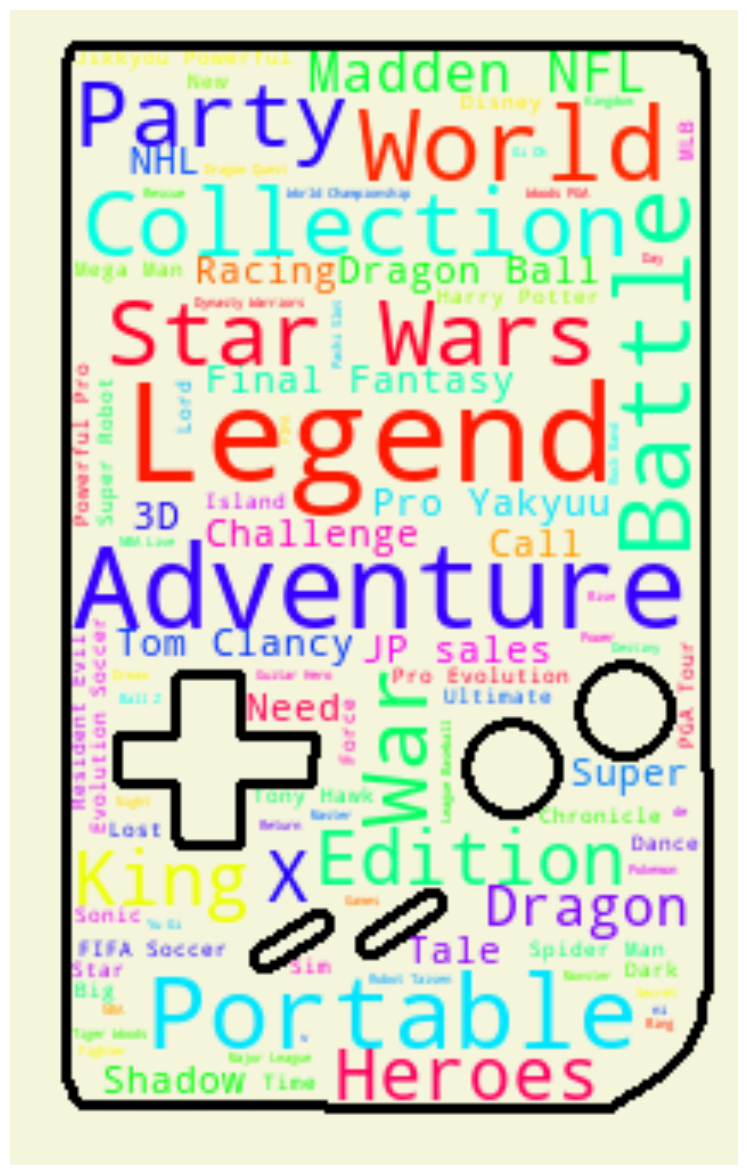

In [13]:
# load the mask image for the wordcloud
simple_mask = np.array(Image.open("gameboy.png"))
# define stopwords used for wordcloud
stopwords = set(STOPWORDS)
stopwords.update(["II", "III", "Game", "the", "and", "of", "DS"])
# generate the wordcloud
wordcloud = WordCloud(
    mask=simple_mask, 
    background_color="beige", 
    colormap="hsv", 
    contour_width=2, 
    contour_color="black",
    stopwords=stopwords,
    width=1200,
    height=1200
    ).generate(" ".join(df.Name))
# Display the wordcloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
#Sort the DF by multiple sales columns in descending order and select top 10 rows
top_sales = df.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales (In Millions)",
    'EU_Sales' : "Europe Sales (In Millions)",
    'JP_Sales' : "Japan Sales (In Millions)",
    'Other_Sales' : "Other Sales (In Millions)",
}
#Iterating over each sales column and its corresponding title in the dictonary
for (key, title) in dicts_name.items():
    #Creating a sunburst chart for the top 10 dales data, showing hierarchy by Genre
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    #Update layout of the chart:
    # Grid settings and adjusting the margin around the chart for improved spacing
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )
#Displaying the chart
    fig.show()

In [15]:
#Creating the variables to deploy Genre based sales stacked chart
xaction=df[df.Genre=="Action"]
xsports=df[df.Genre=="Sports"]
xmisc=df[df.Genre=="Misc"]
xrole=df[df.Genre=="Role-Playing"]
xshooter=df[df.Genre=="Shooter"]
xadventure=df[df.Genre=="Adventure"]
xrace=df[df.Genre=="Racing"]
xplatform=df[df.Genre=="Platform"]
xsimulation=df[df.Genre=="Simulation"]
xfight=df[df.Genre=="Fighting"]
xstrategy=df[df.Genre=="Strategy"]
xpuzzle=df[df.Genre=="Puzzle"]

In [16]:
#Creating a histogram for All the above listed Genres; grouped by platform
trace1 = go.Histogram(
    x=xaction.Platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.Platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.Platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.Platform,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.Platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.Platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.Platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.Platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))
#Combining the histograms above into a single list
data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
#Plot layout 
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
#Creating the figure object with data & layout
fig = go.Figure(data=data, layout=layout)
#Display the plot
iplot(fig)

In [17]:
# Aggregate the sales by platform
action_sales = xaction.groupby('Platform')['Global_Sales'].sum()
sports_sales = xsports.groupby('Platform')['Global_Sales'].sum()
misc_sales = xmisc.groupby('Platform')['Global_Sales'].sum()
role_sales = xrole.groupby('Platform')['Global_Sales'].sum()
shooter_sales = xshooter.groupby('Platform')['Global_Sales'].sum()
adventure_sales = xadventure.groupby('Platform')['Global_Sales'].sum()
race_sales = xrace.groupby('Platform')['Global_Sales'].sum()
platform_sales = xplatform.groupby('Platform')['Global_Sales'].sum()
simulation_sales = xsimulation.groupby('Platform')['Global_Sales'].sum()
fight_sales = xfight.groupby('Platform')['Global_Sales'].sum()
strategy_sales = xstrategy.groupby('Platform')['Global_Sales'].sum()
puzzle_sales = xpuzzle.groupby('Platform')['Global_Sales'].sum()

# Create bar traces for each genre
trace1 = go.Bar(x=action_sales.index, y=action_sales.values, name="Action", marker=dict(color='rgb(165,0,38)'))
trace2 = go.Bar(x=sports_sales.index, y=sports_sales.values, name="Sports", marker=dict(color='rgb(215,48,39)'))
trace3 = go.Bar(x=misc_sales.index, y=misc_sales.values, name="Misc", marker=dict(color='rgb(244,109,67)'))
trace4 = go.Bar(x=role_sales.index, y=role_sales.values, name="Role Playing", marker=dict(color='rgb(253,174,97)'))
trace5 = go.Bar(x=shooter_sales.index, y=shooter_sales.values, name="Shooter", marker=dict(color='rgb(254,224,144)'))
trace6 = go.Bar(x=adventure_sales.index, y=adventure_sales.values, name="Adventure", marker=dict(color='rgb(170,253,87)'))
trace7 = go.Bar(x=race_sales.index, y=race_sales.values, name="Racing", marker=dict(color='rgb(171,217,233)'))
trace8 = go.Bar(x=platform_sales.index, y=platform_sales.values, name="Platform", marker=dict(color='rgb(116,173,209)'))
trace9 = go.Bar(x=simulation_sales.index, y=simulation_sales.values, name="Simulation", marker=dict(color='rgb(69,117,180)'))
trace10 = go.Bar(x=fight_sales.index, y=fight_sales.values, name="Fighting", marker=dict(color='rgb(49,54,149)'))
trace11 = go.Bar(x=strategy_sales.index, y=strategy_sales.values, name="Strategy", marker=dict(color="rgb(10,77,131)"))
trace12 = go.Bar(x=puzzle_sales.index, y=puzzle_sales.values, name="Puzzle", marker=dict(color='rgb(1,15,139)'))

# Combine all traces
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

# Layout settings
layout = go.Layout(
    barmode='stack',
    title='Total Sales by Genre According to Platform',
    xaxis=dict(title='Platform'),
    yaxis=dict(title='Total Sales (in millions)'),
    hovermode='x', #this enables the stacked hover legend on the stacked bar graphs
    paper_bgcolor='beige',
    plot_bgcolor='beige'
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()
#fig.write_image("genre_sales_by_platform.png", width=1200, height=800)



In [18]:
# Describe the data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Range

In [19]:
global_sales_range = df['Global_Sales'].max() - df['Global_Sales'].min()
print(f"Range of Global Sales: {global_sales_range}")

Range of Global Sales: 82.72999999999999


Variance

In [20]:
global_sales_variance = df['Global_Sales'].var()
print(f"Variance of Global Sales: {global_sales_variance}")

Variance of Global Sales: 2.4515163496788195


Standard Deviation

In [21]:
global_sales_std_dev = df['Global_Sales'].std()
print(f"Standard Deviation of Global Sales: {global_sales_std_dev}")

Standard Deviation of Global Sales: 1.5657318894621837


Interquartile Range

In [22]:
q1 = df['Global_Sales'].quantile(0.25)
q3 = df['Global_Sales'].quantile(0.75)
global_sales_iqr = q3 - q1
print(f"IQR of Global Sales: {global_sales_iqr}")

IQR of Global Sales: 0.42


Mean Values

In [23]:
mean_values = df.mean(numeric_only=True)
print(mean_values)

Rank            8292.868194
Year            2006.406443
NA_Sales           0.265415
EU_Sales           0.147554
JP_Sales           0.078661
Other_Sales        0.048325
Global_Sales       0.540232
dtype: float64


In [24]:
genre_encoder = LabelEncoder()
platform_encoder = LabelEncoder()

# Fit and transform 'Genre' column
df['Genre_encoded'] = genre_encoder.fit_transform(df['Genre'])

# Fit and transform 'Platform' column
df['Platform_encoded'] = platform_encoder.fit_transform(df['Platform'])

Histogram of Rank, Year, Sales, Genre and Platform

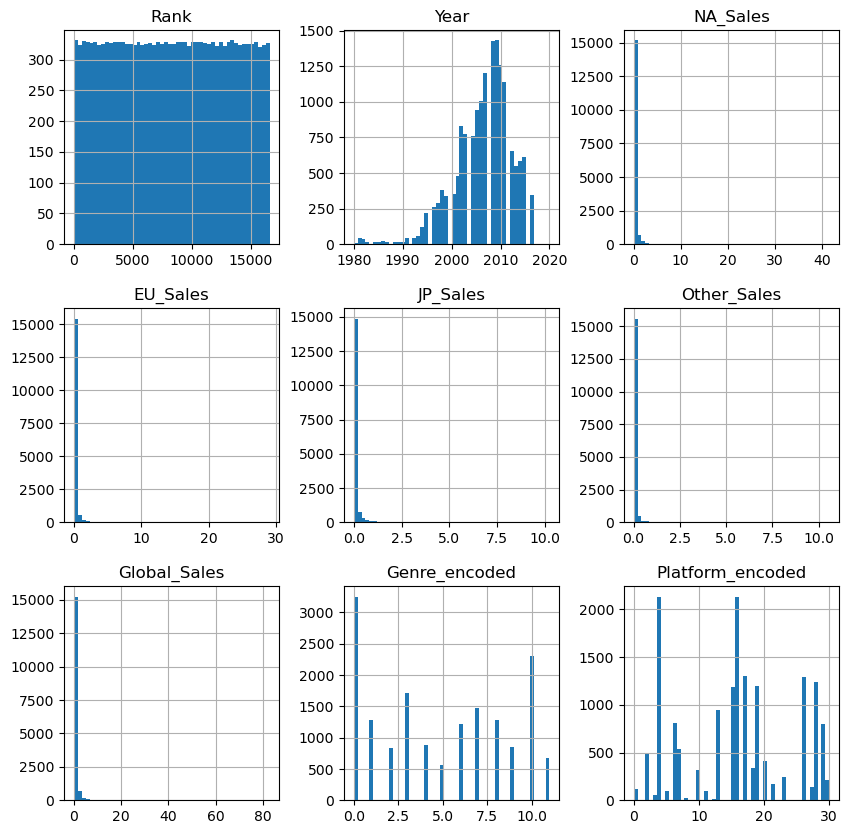

In [25]:
df.hist(bins=50, figsize=(10,10))
plt.show()

Heatmap of Sales Data

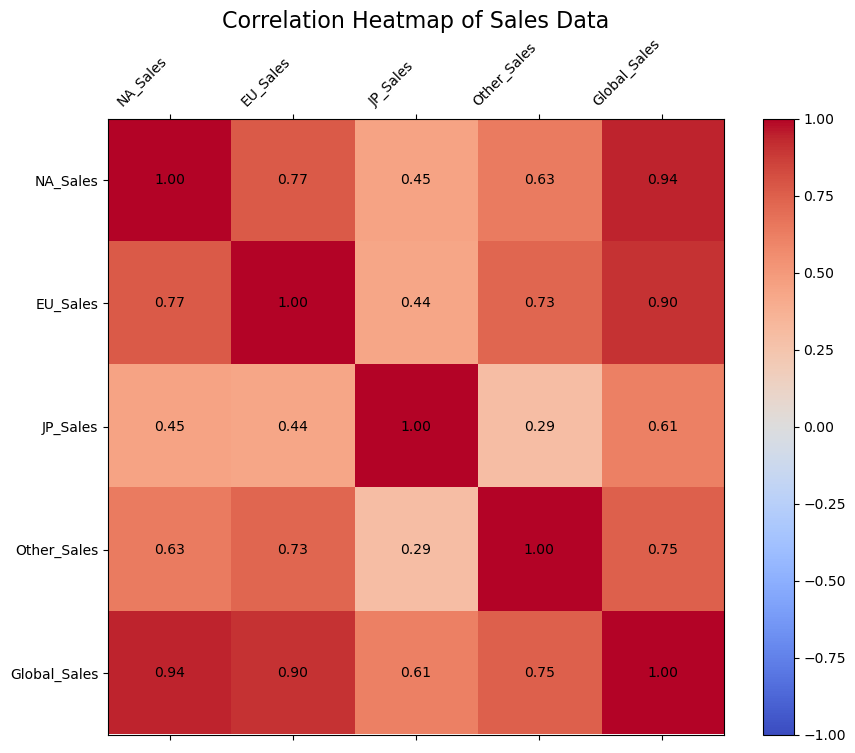

In [26]:
# Calculate the correlation matris for sales
sales_correlation = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

# Plot heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(sales_correlation, cmap='coolwarm', vmin=-1, vmax=1)

# Add color bar
fig.colorbar(cax)

# Add titles and labels
ax.set_xticks(np.arange(len(sales_correlation.columns)))
ax.set_yticks(np.arange(len(sales_correlation.columns)))
ax.set_xticklabels(sales_correlation.columns)
ax.set_yticklabels(sales_correlation.columns)

# Rotate and format tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add annotations
for i in range(len(sales_correlation.columns)):
    for j in range(len(sales_correlation.columns)):
        text = ax.text(j, i, f"{sales_correlation.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.title('Correlation Heatmap of Sales Data', fontsize=16)
plt.show()

In [27]:
# List of sales columns
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Melt the DF from wide format to long
melted_df = df.melt(value_vars=sales_columns, var_name='Sales_Region', value_name='Sales_Amount')

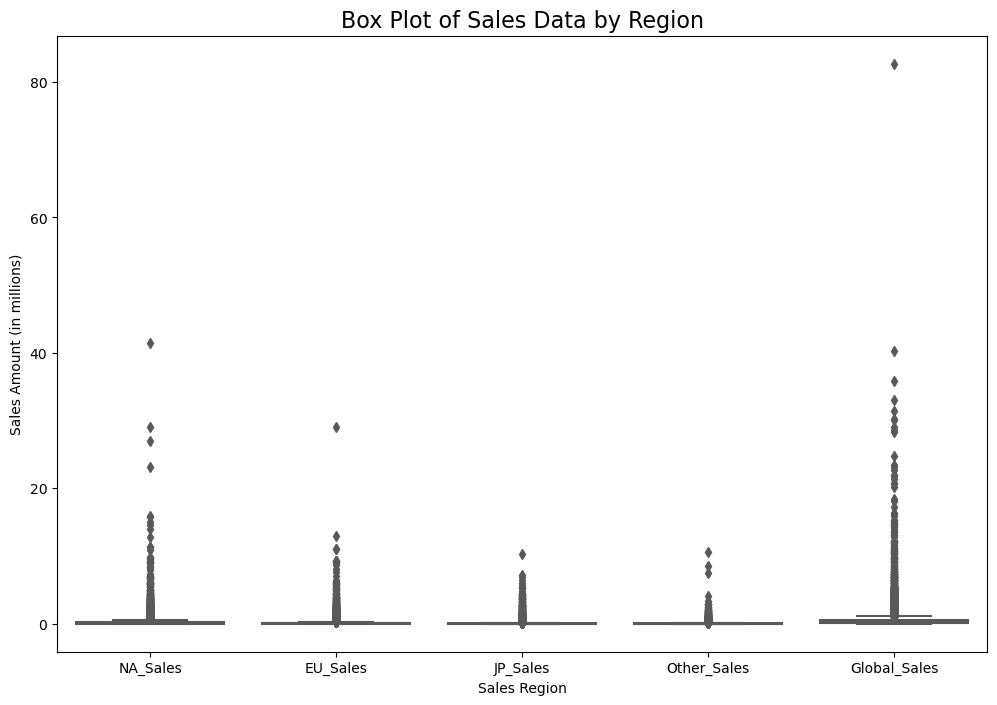

In [28]:
# Create the figure
plt.figure(figsize=(12, 8))
# Create a boxplot to visualize distribution
sns.boxplot(x='Sales_Region', y='Sales_Amount', data=melted_df, palette='Set2')

# Add titles and labels
plt.title('Box Plot of Sales Data by Region', fontsize=16)
plt.xlabel('Sales Region')
plt.ylabel('Sales Amount (in millions)')
plt.show()

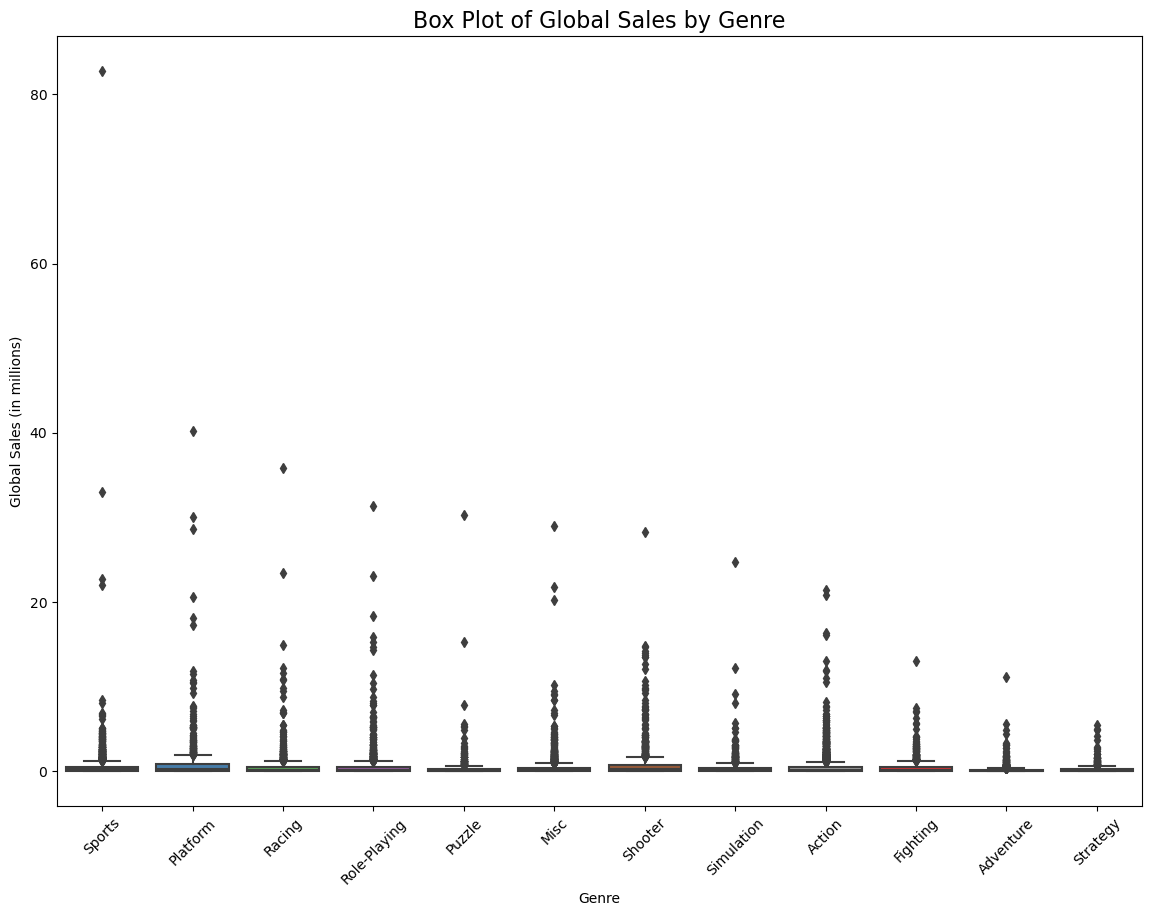

In [29]:
# Create a new figure
plt.figure(figsize=(14, 10))
# Create a boxplot to visualize distribution
sns.boxplot(x='Genre', y='Global_Sales', data=df, palette='Set1')

# Add titles and labels
plt.title('Box Plot of Global Sales by Genre', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

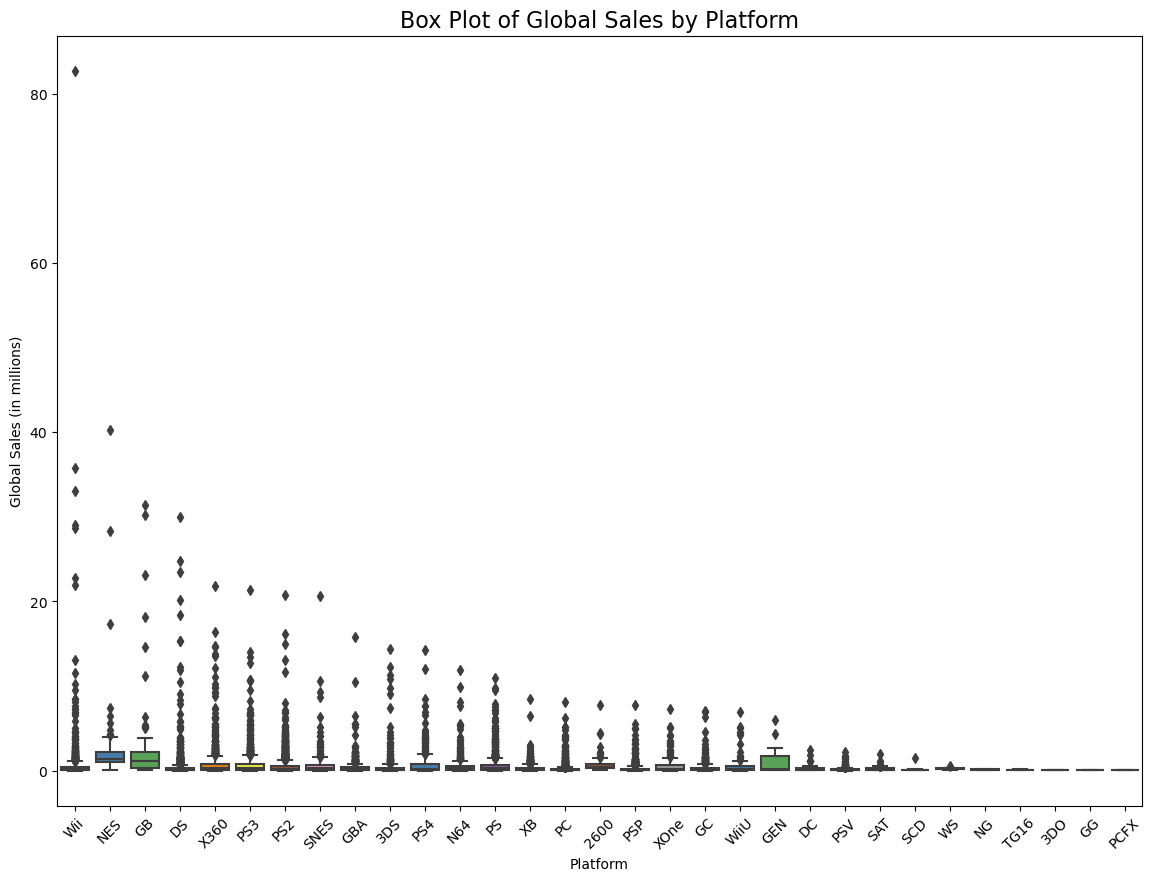

In [30]:
# Create a new figure
plt.figure(figsize=(14, 10))
# Create a boxplot to visualize distribution
sns.boxplot(x='Platform', y='Global_Sales', data=df, palette='Set1')

# Add titles and labels
plt.title('Box Plot of Global Sales by Platform', fontsize=16)
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()